## NFL Fantasy Rookie Project Part 2 - Wide Receivers

### Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
final_wr = pd.read_csv('C:/Users/kevin/Downloads/Full Receiving Model 2017-2022.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
final_wr.columns

Index(['Player', 'Team', 'Year', 'Height', 'Weight', '40 Time', 'Pick',
       'Teammate', 'Teammate Year', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Tgt',
       'Rec', 'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb',
       'Teammate Tm', 'Teammate Age', 'Teammate Pos', 'Teammate G',
       'Teammate GS', 'Teammate Tgt', 'Teammate Rec', 'Teammate Yds',
       'Teammate Y/R', 'Teammate TD', 'Teammate 1D', 'Teammate Lng',
       'Teammate Y/Tgt', 'Teammate R/G', 'Teammate Y/G', 'Teammate Fmb',
       'Total FP', 'FPPG'],
      dtype='object')

### Linear Regression

In [12]:
predictors = ['Height', 'Weight', '40 Time', 'Pick', 'Age', 'Teammate Age', 'Teammate G',
              'Teammate Tgt', 'Teammate Rec', 'Teammate Yds',
           'Teammate Y/R', 'Teammate TD', 'Teammate 1D', 'Teammate Lng',
           'Teammate Y/Tgt', 'Teammate R/G', 'Teammate Y/G', 'Teammate Fmb']

target = ['FPPG']

In [13]:
train = final_wr[final_wr["Year"].isin([2018, 2019, 2020, 2021])]
test = final_wr[final_wr["Year"] == 2022]

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(train[predictors],train[target])

LinearRegression()

In [16]:
predictions = lm.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
combination = pd.concat([test[["Player", "Year", "FPPG"]], predictions], axis=1)

In [17]:
from sklearn import metrics

In [18]:
print('MAE:', metrics.mean_absolute_error(combination["FPPG"], combination["predictions"]))
print('MSE:', metrics.mean_squared_error(combination["FPPG"], combination["predictions"]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(combination["FPPG"], combination["predictions"])))
print('R-squared: ', metrics.explained_variance_score(combination["FPPG"], combination["predictions"]))
print('R: ', np.sqrt(metrics.explained_variance_score(combination["FPPG"], combination["predictions"])))

MAE: 2.929810256351955
MSE: 11.531533844542086
RMSE: 3.395811220392277
R-squared:  0.46819852471588563
R:  0.684250337753578


Like the running back model, the wide receiver linear regression model is pretty strong with an R score of 0.68. In fact, it is even stronger. Despite that, there is more variance in my predicted top 10 compared to actuals. 3 of the actual top 5 finishes are not included in the model's top 5.

In [19]:
combination.sort_values(by='predictions', ascending=False).head(10)

,Player,Year,FPPG,predictions
39,Wan'Dale Robinson,2022,8.616667,10.319747
33,Garrett Wilson,2022,12.547059,10.051383
37,Treylon Burks,2022,7.581818,9.149927
35,Jameson Williams,2022,1.850000,8.763569
34,Chris Olave,2022,13.080000,8.643032
41,Tyquan Thornton,2022,4.515385,8.583028
38,Christian Watson,2022,10.292857,8.054930
32,Drake London,2022,10.388235,7.957112
36,Jahan Dotson,2022,10.775000,7.705079
42,George Pickens,2022,9.182353,7.525098


In [20]:
# Get the coefficients and corresponding feature names
lm_coefs = lm.coef_.ravel()
feature_names = train[predictors].columns.tolist()  # Convert DataFrame to a list of column names

# Create a DataFrame to store the coefficients and feature names
coefs_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lm_coefs})

# Sort the DataFrame by absolute coefficient values
coefs_df['Absolute Coefficient'] = coefs_df['Coefficient'].abs()
coefs_df = coefs_df.sort_values('Absolute Coefficient', ascending=False).reset_index(drop=True)

# Print the feature importance
print(coefs_df)

           Feature  Coefficient  Absolute Coefficient
0          40 Time    -1.655451              1.655451
1   Teammate Y/Tgt     1.104550              1.104550
2     Teammate Y/R    -0.820031              0.820031
3     Teammate R/G     0.647249              0.647249
4     Teammate Fmb     0.348957              0.348957
5              Age    -0.333719              0.333719
6     Teammate Rec    -0.209859              0.209859
7       Teammate G     0.189912              0.189912
8     Teammate Age    -0.124095              0.124095
9     Teammate Tgt     0.100129              0.100129
10     Teammate 1D     0.098526              0.098526
11     Teammate TD    -0.061065              0.061065
12          Height    -0.043337              0.043337
13            Pick    -0.033945              0.033945
14    Teammate Y/G     0.033423              0.033423
15          Weight    -0.015799              0.015799
16    Teammate Lng     0.013218              0.013218
17    Teammate Yds    -0.007

In [21]:
import statsmodels.api as sm
results = sm.OLS(train[target],train[predictors]).fit()
p_value = results.pvalues[predictors]
p_value.sort_values()

Pick              1.424792e-13
Teammate 1D       1.406526e-01
Teammate Y/Tgt    1.654558e-01
Weight            1.804693e-01
Teammate Fmb      2.011277e-01
Teammate Rec      2.439155e-01
Teammate Y/R      2.440524e-01
Teammate Tgt      2.748456e-01
40 Time           2.997050e-01
Teammate Age      4.724461e-01
Height            4.751570e-01
Teammate G        5.089849e-01
Teammate Yds      5.374475e-01
Teammate Lng      5.825256e-01
Age               6.599060e-01
Teammate TD       7.582221e-01
Teammate R/G      8.469748e-01
Teammate Y/G      8.794182e-01
dtype: float64

Interesting here: the pick still matters a lot but other factors beyond the teammate's production is appearing as relatively significant predictors. The weight (which has a negative efficient, and 40 time are much more significant than in the running back model. Additionally, Teammate first downs (positive coefficient) is the second most significant predictor. Combining these results into a thought here: if your teammate gets more first downs they are probably a possession type of guy instead of a big play threat. If you have a fast 40 time, you can fill in the void of a big play threat, and it is the big play threats that carve out successful rookie seasons.

In [22]:
predictors = ['Height', 'Weight', '40 Time', 'Pick', 'Age', 'Teammate Age', 'Teammate G',
              'Teammate Tgt', 'Teammate Rec', 'Teammate Yds',
           'Teammate Y/R', 'Teammate TD', 'Teammate 1D', 'Teammate Lng',
           'Teammate Y/Tgt', 'Teammate R/G', 'Teammate Y/G', 'Teammate Fmb']

target = ['Total FP']

In [23]:
train = final_wr[final_wr["Year"].isin([2018, 2019, 2020, 2021])]
test = final_wr[final_wr["Year"] == 2022]

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(train[predictors],train[target])

LinearRegression()

In [26]:
predictions = lm.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
combination = pd.concat([test[["Player", "Year", "Total FP"]], predictions], axis=1)

In [27]:
print('MAE:', metrics.mean_absolute_error(combination["Total FP"], combination["predictions"]))
print('MSE:', metrics.mean_squared_error(combination["Total FP"], combination["predictions"]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(combination["Total FP"], combination["predictions"])))
print('R-squared: ', metrics.explained_variance_score(combination["Total FP"], combination["predictions"]))
print('R: ', np.sqrt(metrics.explained_variance_score(combination["Total FP"], combination["predictions"])))

MAE: 47.93021905038311
MSE: 3144.3254646555765
RMSE: 56.07428523535165
R-squared:  0.3772094542802562
R:  0.6141737981062496


In [28]:
combination.sort_values(by='predictions', ascending=False).head(10)

,Player,Year,Total FP,predictions
33,Garrett Wilson,2022,213.3,142.005018
39,Wan'Dale Robinson,2022,51.7,140.664317
35,Jameson Williams,2022,11.1,137.656070
32,Drake London,2022,176.6,125.453323
37,Treylon Burks,2022,83.4,124.568166
34,Chris Olave,2022,196.2,119.445931
38,Christian Watson,2022,144.1,116.501897
42,George Pickens,2022,156.1,114.694657
41,Tyquan Thornton,2022,58.7,114.583766
36,Jahan Dotson,2022,129.3,108.250968


Once again, the model with total points for the year is not as successful as the fantasy points per game model.

### Projecting the 2023 Rookies

In [38]:
predictors = ['Height', 'Weight', '40 Time', 'Pick', 'Teammate Age', 'Teammate G',
              'Teammate Tgt', 'Teammate Rec', 'Teammate Yds',
           'Teammate Y/R', 'Teammate TD', 'Teammate 1D', 'Teammate Lng',
           'Teammate Y/Tgt', 'Teammate R/G', 'Teammate Y/G', 'Teammate Fmb']

target = ['FPPG']

In [39]:
train = final_wr[final_wr["Year"].isin([2018, 2019, 2020, 2021, 2022])]
test = final_wr[final_wr["Year"] == 2023]

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(train[predictors],train[target])

LinearRegression()

In [33]:
predictions = lm.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
combination = pd.concat([test[["Player", "Year"]], predictions], axis=1)

In [34]:
combination.sort_values(by='predictions', ascending=False).head(15)

,Player,Year,predictions
2,Zay Flowers,2023,8.171696
5,Jayden Reed,2023,7.613927
0,Jaxon Smith-Njigba,2023,7.267047
8,Nathaniel Dell,2023,7.195529
4,Jonathan Mingo,2023,7.032665
1,Quentin Johnston,2023,6.802897
9,Jalin Hyatt,2023,6.290856
7,Marvin Mims,2023,6.218457
12,Michael Wilson,2023,5.787349
15,Charlie Jones,2023,5.684288


Nuances that need to be taken into account: Zay Flowers has a high projection because his best teammate is Odell Beckham, who had 0 stats last year. Additionally, a guy like Jordan Addison is low here because his teammate is the leading receiver in the entire NFL, Justin Jefferson. If Addison entrenches himself as the WR2 there, he should easily outperform the projection.

I'm going to update Flowers's teammate to Mark Andrews and see how the results change.

In [40]:
train = final_wr[final_wr["Year"].isin([2018, 2019, 2020, 2021, 2022])]
test = final_wr[final_wr["Year"] == 2023]

lm = LinearRegression()

lm.fit(train[predictors],train[target])

predictions = lm.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
combination = pd.concat([test[["Player", "Year"]], predictions], axis=1)

In [41]:
combination.sort_values(by='predictions', ascending=False).head(15)

,Player,Year,predictions
2,Zay Flowers,2023,8.575843
5,Jayden Reed,2023,7.707534
0,Jaxon Smith-Njigba,2023,7.585397
4,Jonathan Mingo,2023,7.359597
8,Nathaniel Dell,2023,7.333378
1,Quentin Johnston,2023,6.946436
9,Jalin Hyatt,2023,6.354798
7,Marvin Mims,2023,6.284379
12,Michael Wilson,2023,5.829745
15,Charlie Jones,2023,5.784064


I noticed I did not fill in the age for the 2023 rookies, so I removed that as a predictor this time around, slightly changing everyone's results. Surprisingly, changing Zay Flowers's best teammate to Mark Andrews still leaves him at the top of the list. This was before I removed age as a predictor as well. With or without that predictor, the model expects Zay Flowers to be the best rookie WR this year in terms of fantasy PPR points per game.

### K Nearest Neighbors Analysis

Because the SVM was not successful in the running back part, we are trying a K Nearest Neighbors analysis. The target column being created is still the same. The target is 1 if the receiver finished top 5 on the year and 0 otherwise.

In [8]:
def add_target_column(df):
    # Sort the dataframe by 'FPPG' column in descending order within each 'Year' group
    sorted_df = df.groupby('Year', group_keys=False).apply(lambda x: x.nlargest(5, 'FPPG'))
    
    # Create the 'Target' column and set it to 1 for the top 5 rows, and 0 for the rest
    sorted_df['Target'] = 1
    sorted_df['Target'] = sorted_df['Target'].fillna(0).astype(int)
    
    # Merge the sorted and updated dataframe back with the original dataframe
    df = df.merge(sorted_df[['Year', 'Player', 'Target']], on=['Year', 'Player'], how='left')
    
    return df

# Usage example:
# Assuming 'final_rb' is your original dataframe
new_wr = add_target_column(final_wr)

In [9]:
new_wr = new_wr.fillna(0)

In [10]:
new_wr.columns

Index(['Player', 'Team', 'Year', 'Height', 'Weight', '40 Time', 'Pick',
       'Teammate', 'Teammate Year', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Tgt',
       'Rec', 'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb',
       'Teammate Tm', 'Teammate Age', 'Teammate Pos', 'Teammate G',
       'Teammate GS', 'Teammate Tgt', 'Teammate Rec', 'Teammate Yds',
       'Teammate Y/R', 'Teammate TD', 'Teammate 1D', 'Teammate Lng',
       'Teammate Y/Tgt', 'Teammate R/G', 'Teammate Y/G', 'Teammate Fmb',
       'Total FP', 'FPPG', 'Target'],
      dtype='object')

In [11]:
predictors = ['Height', 'Weight', '40 Time', 'Pick', 'Age', 'Teammate Age', 'Teammate G',
              'Teammate Tgt', 'Teammate Rec', 'Teammate Yds',
       'Teammate Y/R', 'Teammate TD', 'Teammate 1D', 'Teammate Lng',
       'Teammate Y/Tgt', 'Teammate R/G', 'Teammate Y/G', 'Teammate Fmb']

target = ['Target']

In [12]:
train = new_wr[new_wr["Year"].isin([2018, 2019, 2020, 2021])]
test = new_wr[new_wr["Year"] == 2022]

In [2]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Scaling predictors
scaler = StandardScaler()
scaler.fit(train[predictors])
df_feat = pd.DataFrame(scaler.transform(train[predictors]), columns=predictors)
test_feat = pd.DataFrame(scaler.transform(test[predictors]), columns=predictors)

In [22]:
# Assuming 'Target' is a categorical column with class labels
train_labels = train[target]
test_labels = test[target]

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# Creating KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(df_feat, train_labels.values.ravel())  # Ravel to convert to 1D array

KNeighborsClassifier(n_neighbors=1)

In [24]:
pred = knn.predict(test_feat)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(test_labels,pred))
print(classification_report(test_labels,pred))

[[16  7]
 [ 3  2]]
              precision    recall  f1-score   support

         0.0       0.84      0.70      0.76        23
         1.0       0.22      0.40      0.29         5

    accuracy                           0.64        28
   macro avg       0.53      0.55      0.52        28
weighted avg       0.73      0.64      0.68        28



This model with K value set at 1 has a higher error rate than the other versions tried below, but in terms of precision and recall of the target value 1, it is better than those with low error rates, making this more valuable. That said, a precision percentage of 22% and a recall percentage of 40% is not great.

In [28]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(df_feat, train_labels.values.ravel())
    pred_i = knn.predict(test_feat)
    error_rate.append(np.mean(pred_i != test_labels.values.ravel()))

Text(0, 0.5, 'Error Rate')

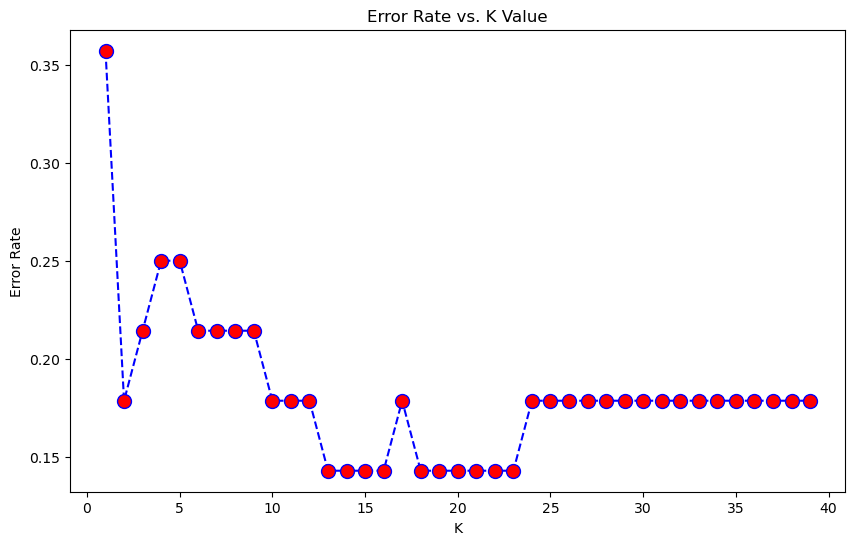

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(df_feat, train_labels.values.ravel())
pred = knn.predict(test_feat)

print('WITH K=2')
print('\n')
print(confusion_matrix(test_labels,pred))
print(classification_report(test_labels,pred))

WITH K=10


[[22  1]
 [ 4  1]]
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        23
         1.0       0.50      0.20      0.29         5

    accuracy                           0.82        28
   macro avg       0.67      0.58      0.59        28
weighted avg       0.78      0.82      0.79        28



As you can see, the better model still only recalls 20% of target value 1.

### K Means Clustering

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
def yearly_outperformers(df, group):
    # Grouping the DataFrame by 'Year'
    groups = df.groupby(group)

    # Sorting the groups based on 'WS/48_diff' column and retrieving the top 15 results
    top_results = groups.apply(lambda x: x.sort_values('FPPG', ascending=False).head(5))

    # Resetting the index of the DataFrame
    top_results = top_results.reset_index(drop=True)

    return top_results

In [6]:
temp = yearly_outperformers(final_wr, 'Year')
top_wrs = temp[temp["Year"].isin([2018, 2019, 2020, 2021, 2022])]

In [10]:
top_wrs.to_csv('C:/Users/kevin/Downloads/Top 5 WRs 2018-2022.csv', index = False)

In [50]:
top_wrs = pd.read_csv('C:/Users/kevin/Downloads/Top 5 WRs 2018-2022.csv')

In [40]:
predictors = ['Height', 'Weight', '40 Time', 'Pick', 'Age', 'Teammate Age', 'Teammate G',
              'Teammate Tgt', 'Teammate Rec', 'Teammate Yds',
       'Teammate Y/R', 'Teammate TD', 'Teammate 1D', 'Teammate Lng',
       'Teammate Y/Tgt', 'Teammate R/G', 'Teammate Y/G', 'Teammate Fmb']

target = ['FPPG']

In [41]:
train = top_wrs[top_wrs["Year"].isin([2018, 2019, 2020, 2021, 2022])]

In [ ]:
silhouette = []

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=99)
    cluster_labels = kmeans.fit_predict(train[predictors])
    
    centers = kmeans.cluster_centers_
    
    score = silhouette_score(train[predictors], cluster_labels)
    silhouette.append(score)
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

Text(0.5, 0.98, 'Identifying Optimal Cluster #')

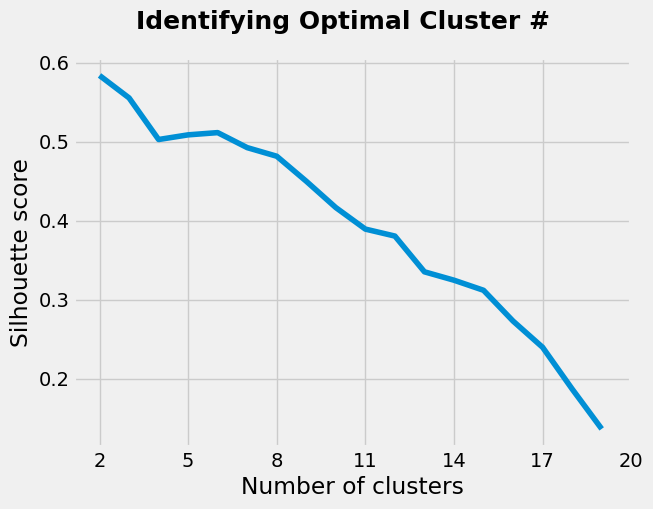

In [43]:
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2,20), silhouette)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

ax.set_xticks(np.arange(2,21, 3.0))

silhouette_fig.suptitle('Identifying Optimal Cluster #', weight = 'bold', size = 18)

In [48]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(train[predictors])

y_kmeans = kmeans.predict(train[predictors])

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


I am skipping a thorough explanation of the steps for running this cluster analysis because I also ran this in part 2 (running backs).

In [49]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = train['Player']
df_cluster['Cluster'] = y_kmeans
df_cluster.sort_values(by='Cluster')

,Player,Cluster
0,Calvin Ridley,0
1,Keke Coutee,0
2,Christian Kirk,0
22,Jahan Dotson,0
18,Elijah Moore,0
8,D.K. Metcalf,0
15,Ja'Marr Chase,0
14,Tee Higgins,0
23,Drake London,0
13,CeeDee Lamb,0


Hard to tell from these clusters specific patterns. Most of these players are first or second round picks. Most of these guys are also known for their big play capability, however that typically goes hand in hand with being a high pick and being successful in the NFL.